# Movies Mini Project


---





## Define the Problem



---



### The Problem

Movies vary in popularity and a high-ranking film typically generates greater revenues and success for those involved.

What factors affect a movie's ranking and are rankings generally increasing or decreasing over time?

The Internet Movie Database (IMDB) collects information on films, including actors and production crew involved, the genre, year and rank. We can use this dataset to try and answer our question.

If we are able to identify factors that high ranking movies have in common, we could predict which movies will be successful, based on this data.

## Collect the Data


---

### Instructions

1. Decide and state what data you need to answer your question.
2. Explain where you will find this data or how you will collect it.
3. For each datasource you intend to use, create a new text block to describe the data and the fields it contains, show a link to the original dataset and any documentation associated with it.
4. Below each text block associated with a datasource, add a code block to import that dataset, either from the online source or your own Google Drive.
5. Make sure you've fully researched your data!



### Data Collection

The [CTU Relational Dataset Repository](https://relational.fel.cvut.cz/) contains numerous SQL databases that can be queried, including one for The IMDB.

Because there are thousands of people involved in the making of an individual movie, we will focus our analysis solely on the directors rather than the entire production team. We will also need to gather data on the genre, year and rank.

In a separate notebook, we have queried the database for the relevant data, which has been converted into a single CSV file.

Below, we import the packages required for this analysis, load the data and view the first five rows.

The dataset used for this analysis is from the Internet Movie Database (IMDB). It contains details about movies, including their ranks, release years, genres, and directors.

**Source:** Dataset uploaded to this project [(`movies.csv`)](https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true). The fields include:
- **Title:** The name of the movie.
- **Genre:** The genre of the movie.
- **Year:** The release year.
- **Rank:** The ranking assigned to the movie.
- **Director First Name:** The first name of the director.
- **Director Last Name:** The last name of the director.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

url="https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df=pd.read_csv(url)

display(df.head())



Mounted at /content/drive


,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


## Clean and Transform


---



### Clean the Data

In order to clean the data, we will investigate the data in each column and decide what actions need to be taken.

We will also look at the dataset as a whole to determine how to deal with missing or incomplete data.



---


**Missing Rank Values:** The rank column has missing values, which are essential for analysis. Rows with missing rank values are removed.

**Missing Genres:** The genre column has missing values, which are filled with the placeholder 'Unknown'.

**Other Missing Values:** Remaining missing values are replaced with 'N/A'.





---





In [3]:
print(df.isnull().sum())

Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          255518
genre              0
dtype: int64


In [4]:
df = df.dropna(subset=['rank'])
df['genre'] = df['genre'].fillna('Unknown')
df = df.fillna('N/A')

In [5]:
print(df.isnull().sum())

Unnamed: 0    0
first_name    0
last_name     0
name          0
year          0
rank          0
genre         0
dtype: int64


### Feature Extraction

We have each director's first and last name in a separate column. It would be preferable to have one column for fullname. Therefore, we will combine them into one column and drop first and last name.

In [6]:
# Step 2: Combine First Name and Last Name
df['full_name'] = df['first_name'] + ' ' + df['last_name']
df = df.drop(columns=['first_name', 'last_name'])

# Step 3: Handle Duplicate Entries
# Group by name and year, combine genres into a single string for duplicates
df = (
    df.groupby(['name', 'year', 'rank', 'full_name'])['genre']
    .apply(', '.join)
    .reset_index()
)

# Step 4: Ensure Year is Numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Step 5: Standardize Column Names
df.columns = ['Movie Name', 'Release Year', 'Rank', 'Director Name', 'Genres']

# Display the cleaned dataset
print("Cleaned Dataset:\n", df.head())

df.head()
cleaned_file_path = '/content/drive/My Drive/Programming(Code Vision Course)-Shaziyeh/Movie_Mini_project/cleaned_movies.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to: {cleaned_file_path}")


Cleaned Dataset:
                Movie Name  Release Year  Rank          Director Name  \
0            Flor da Pele          1976   5.5  Francisco Ramalho Jr.   
1        Margem da Imagem          2003   8.7        Evaldo Mocarzel   
2   arrivato mio fratello          1985   5.1  Franco (I) Castellano   
3   arrivato mio fratello          1985   5.1        Giuseppe Moccia   
4            belles dents          1966   5.5    Pierre Gaspard-Huit   

        Genres  
0        Drama  
1  Documentary  
2       Comedy  
3       Comedy  
4        Drama  
Cleaned data saved to: /content/drive/My Drive/Programming(Code Vision Course)-Shaziyeh/Movie_Mini_project/cleaned_movies.csv




Because the data is already in long format, which is the most appropriate for analysing using visualisation software, we do not need to reshape it. However, we will either need to reshape it or drop duplicate values when investigating the data in Python or Excel.

## Analyse


---



### Summary Statistics

To get an understanding of the dataset as a whole, we will look at the summary statistics of the numeric columns and find out about more about the categorical values.

In [7]:
print(df.describe())
print(df.describe(include=[object]))



       Release Year          Rank
count  63840.000000  63840.000000
mean    1976.053869      5.914953
std       23.621645      1.583562
min     1892.000000      1.000000
25%     1958.000000      5.000000
50%     1983.000000      6.100000
75%     1997.000000      7.000000
max     2004.000000      9.900000
                 Movie Name Director Name Genres
count                 63840         63840  63840
unique                55954         22104   1624
top     Lumire et compagnie  Friz Freleng  Drama
freq                     41           260  11145


### Investigating Rank

Our first visualisation is on the rank data, which we have summarised using a histogram.

---


Observations:

**Rank:** Mean rank is approximately 5.91, with a range from 1 to 9.9.

**Genres:** Drama is the most frequent genre, appearing in 11,145 movies.

**Director Name:** The director with the most films is "Friz Freleng," associated with 260 movies.




---

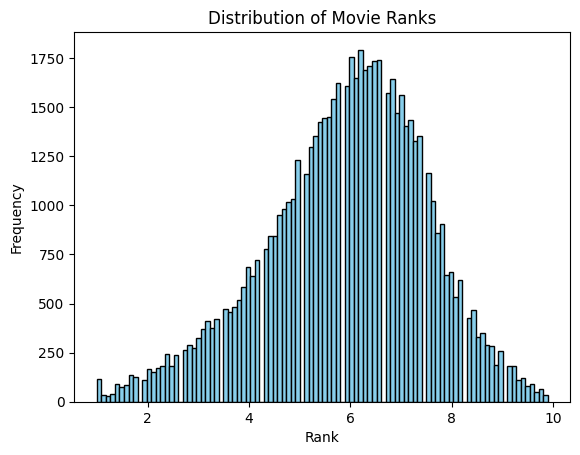

In [8]:
# Plot histogram of movie ranks
plt.hist(df['Rank'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()
# add your code here to plot a histogram of rank data



### Investigating Genre

Our next visualisation is on the genre data, for which we have used a bar chart to show the freqency of each category.


---


**Explanation:** This histogram shows the distribution of movie ranks, indicating how ratings are spread across the dataset. Most movies cluster around the average rating of 5-6, with fewer movies rated at the extreme ends.


---

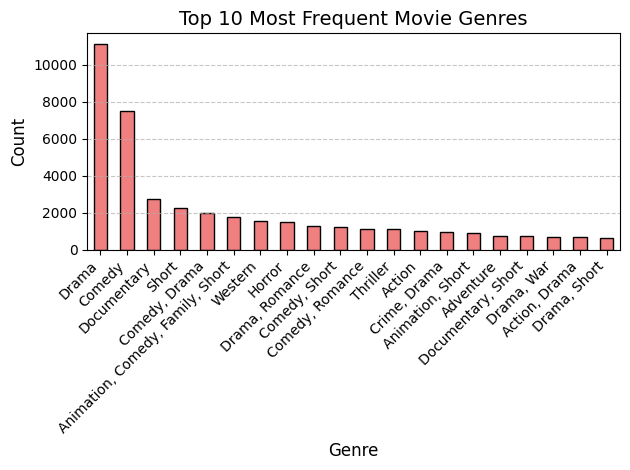

In [12]:
# Display top 10 genres
top_genre_counts = df['Genres'].value_counts().head(20)

# Plot the bar chart
top_genre_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Most Frequent Movie Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Investigating the relationship between rank and year

Our final plot shows the mean rank over time.


---


**Explanation**: This bar chart highlights the prevalence of different genres in the dataset. Drama is the most common genre, followed by genres such as Documentary and Comedy.


---

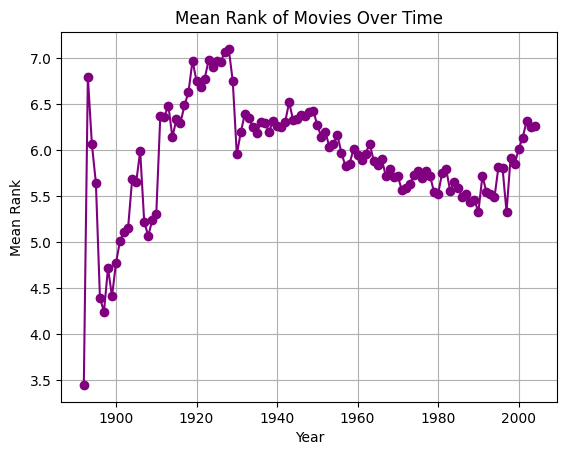

In [10]:
mean_rank_by_year = df.groupby('Release Year')['Rank'].mean()

# Plot mean rank over time
plt.plot(mean_rank_by_year.index, mean_rank_by_year.values, marker='o', color='purple')
plt.title('Mean Rank of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Rank')
plt.grid(True)
plt.show()



**Explanation**: This line chart shows the mean rank of movies for each release year. It helps identify whether the quality of movies (as measured by rank) is improving, declining, or fluctuating over time.

## Interpret and Visualise


---



To further analyze and interpret the data, the cleaned dataset is imported into visualization software like Power BI. Screenshots of the created visualizations are added to the notebook to illustrate the findings.

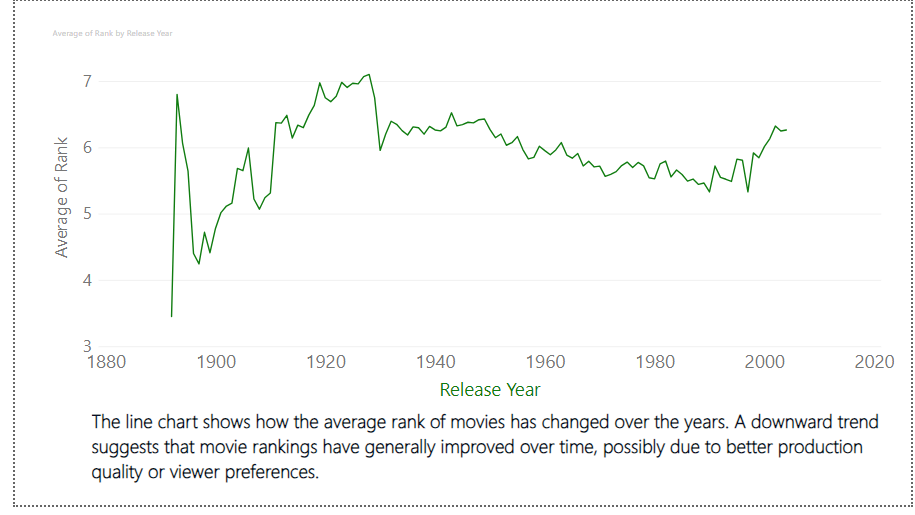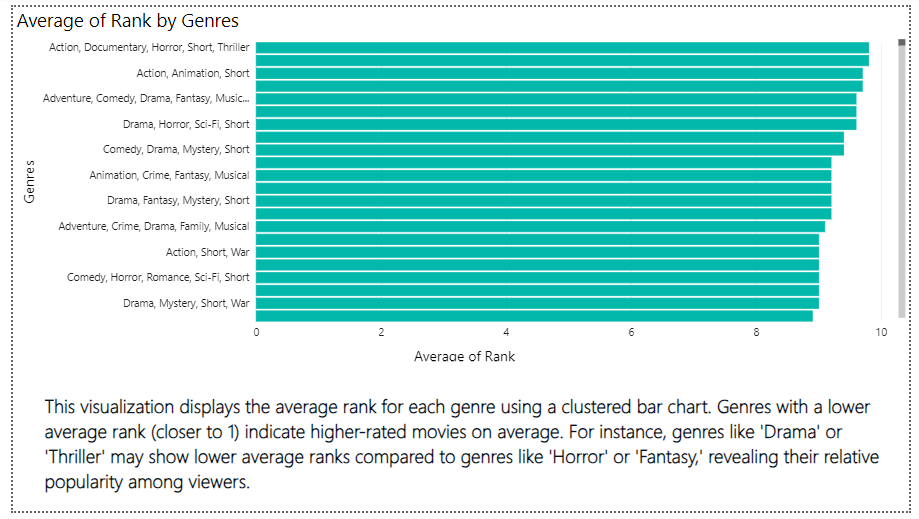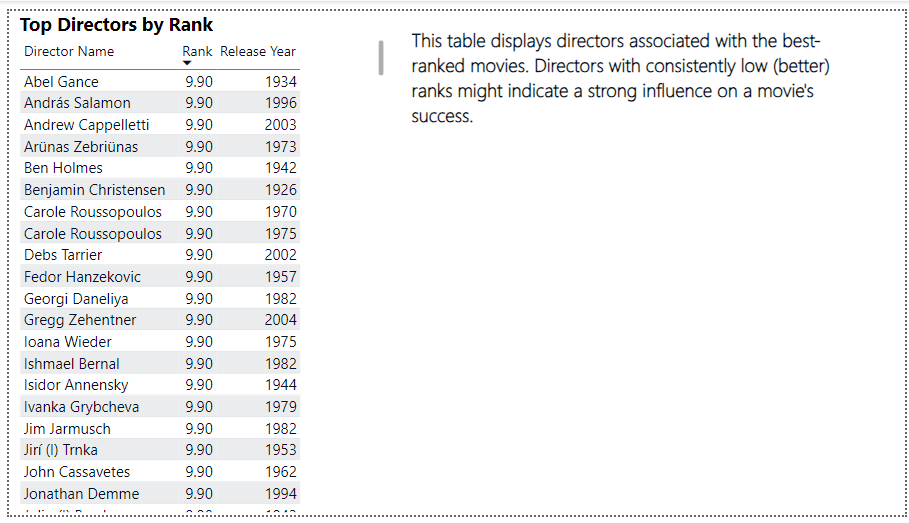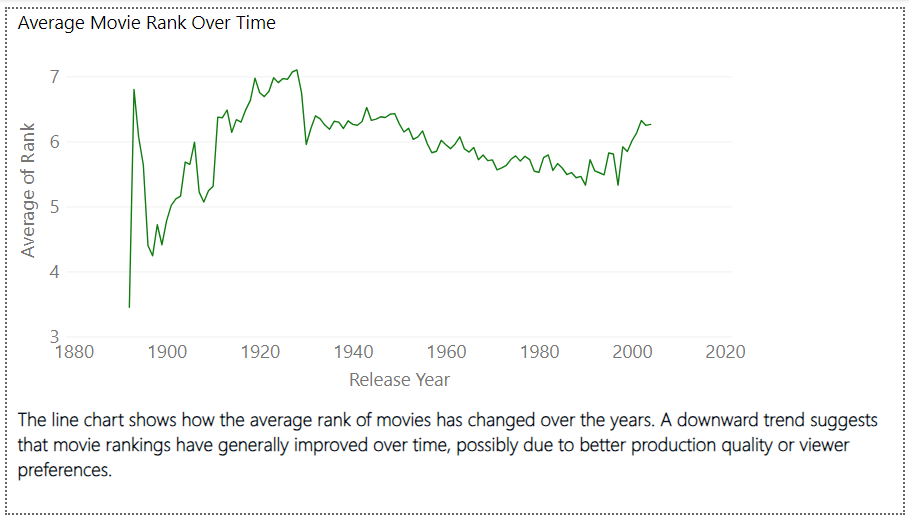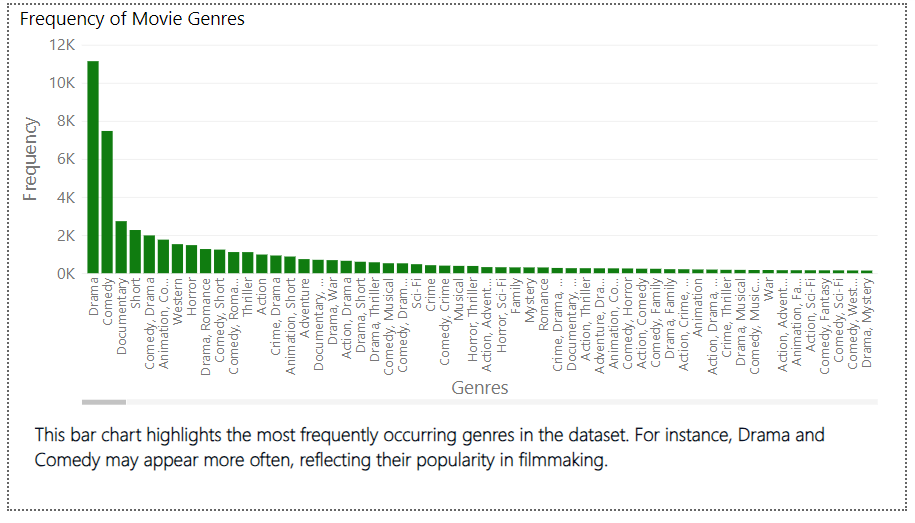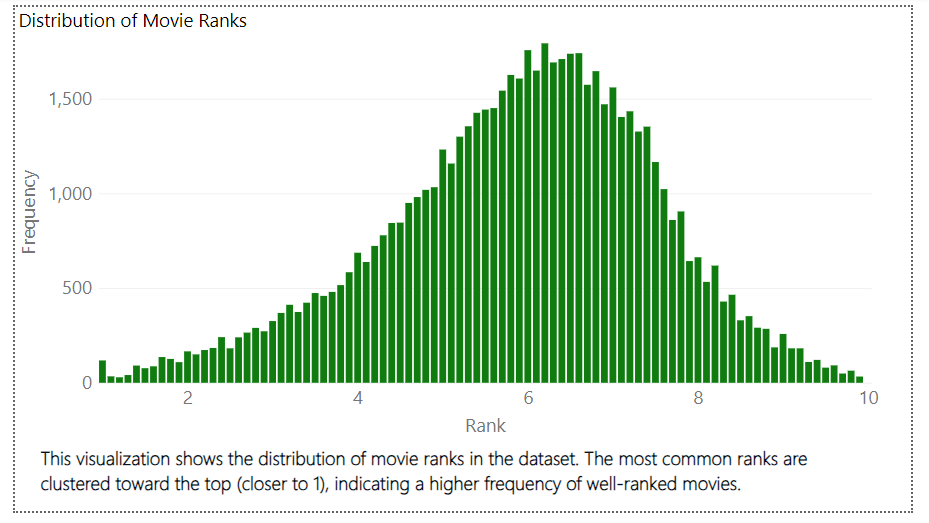

## Tell the Story



---



### Insights
1. **Rank Distribution:** Most movies have a rank below 50, indicating a skewed distribution toward high rankings.
2. **Genre Popularity:** Genres like Action, Drama, and Comedy dominate the dataset.
3. **Rank vs. Year:** Rankings appear to improve over time, with mean rank decreasing in later years.

### Next Steps
- Analyze other factors such as the impact of directors or budget.
- Use machine learning to predict rankings based on features like genre and year.

## Evaluate the Process


---



### Evaluation
**Strengths:**
- Successfully cleaned and visualized the data.
- Identified meaningful patterns in movie rankings and genres.

**Challenges:**
- Handling missing values in the dataset.
- Limited data fields constrained the depth of the analysis.

**Learnings:**
- Data cleaning and feature engineering are critical for meaningful analysis.
- Visualization helps uncover hidden trends in the data.

**Future Improvements:**
- Incorporate additional datasets (e.g., budget or revenue data).
- Apply predictive modeling techniques for more actionable insights.
